In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from itertools import combinations
from sklearn.tree import DecisionTreeRegressor

longitude : 경도  
latitude : 위도  
housing_median_age : 주택 나이(중앙값)  
total_rooms : 전체 방 수  
total_bedrooms : 전체 침실 수  
population : 인구 수  
households : 세대 수  
median_income : 소득(중앙값)  
median_house_value : 주택 가치(중앙값)  
ocean_proximity : 바다 근접도  

[1] 데이터 불러오기

In [13]:
df = pd.read_csv('../DATA/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


[2] 결측치 제거

In [15]:
df.dropna(inplace = True)
df.reset_index(drop=True, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


[3] 중복값 확인

In [16]:
df.duplicated().sum()

0

In [17]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


[3] EDA(탐색적 자료 분석)

> 위도 경도 데이터로 산점도 그리기

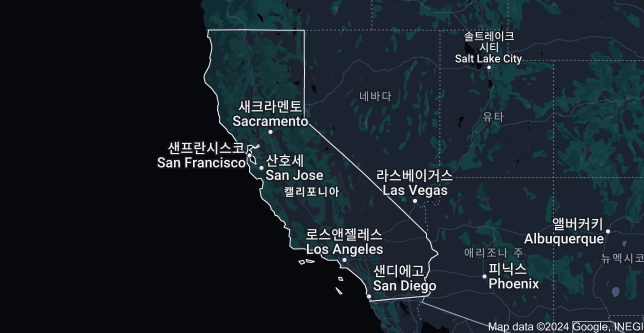

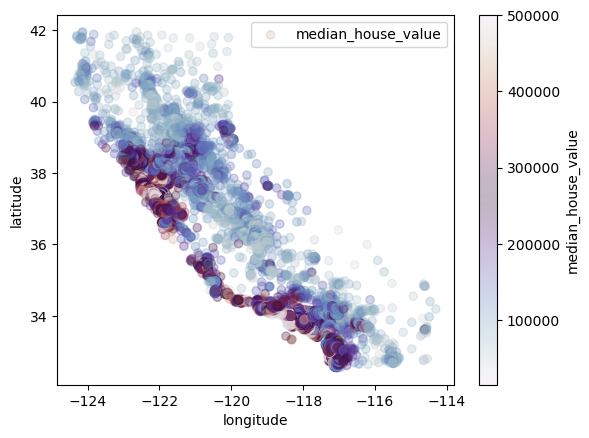

In [32]:
plt.scatter(df['longitude'], df['latitude'], alpha = 0.3,
            c = df['median_house_value'], cmap = 'twilight', label = 'median_house_value')
plt.colorbar(label = 'median_house_value')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend()
plt.show()

> 바다 근처 집들 가격이 높다

In [19]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

> ocean_proximity 변수가 바다 근처 여부를 알려주는 것 같으므로 원핫인코딩 진행

In [20]:
onehot = OneHotEncoder()

onehot.fit(df[['ocean_proximity']])

OneHotEncoder()

In [21]:
onehot_feature = onehot.transform(df[['ocean_proximity']])
onehot_feature

<20433x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20433 stored elements in Compressed Sparse Row format>

In [22]:
ocean_proximity_df = pd.DataFrame(onehot_feature.toarray(), columns=sorted(df['ocean_proximity'].unique()))
ocean_proximity_df

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
20428,0.0,1.0,0.0,0.0,0.0
20429,0.0,1.0,0.0,0.0,0.0
20430,0.0,1.0,0.0,0.0,0.0
20431,0.0,1.0,0.0,0.0,0.0


In [23]:
df = pd.concat([df, ocean_proximity_df], axis = 1)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20428,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0.0,1.0,0.0,0.0,0.0
20429,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0.0,1.0,0.0,0.0,0.0
20430,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0.0,1.0,0.0,0.0,0.0
20431,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0.0,1.0,0.0,0.0,0.0


In [24]:
df.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.003777,0.026477,-0.007603,-0.023647,-0.008674
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,0.073450,-0.019602,-0.010451,-0.061480,-0.023498
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,0.041883,-0.038265,-0.009119,-0.011280,0.002106
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378
<1H OCEAN,0.320831,-0.446928,0.045553,-0.003777,0.018314,0.073450,0.041883,0.168715,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018


> 일단 모든 변수 다 때려넣고 모델 훈련

[4] 선형 회귀 적용

In [25]:
feature = df.drop(['median_house_value', 'ocean_proximity'], axis = 1)
target = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(feature, target,
                                                    train_size = 0.8, random_state = 42)

# mm = MinMaxScaler()
# mm.fit(X_train)

# X_train_scaled = mm.transform(X_train)
# X_test_scaled = mm.transform(X_test)

# 스케일링 과정이 힘들어서 생략
X_train_scaled = X_train
X_test_scaled = X_test

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print(f"train set r2 : {r2_train:.2f}, test set r2 : {r2_test:.2f}")
print(f"train set mse : {mse_train:.2f}, test set mse : {mse_test:.2f}")
print(f"train set rmse : {rmse_train:.2f}, test set r2 : {rmse_test:.2f}")
print(f"train set mae : {mae_train:.2f}, test set r2 : {mae_test:.2f}\n")

train set r2 : 0.65, test set r2 : 0.65
train set mse : 4690511174.84, test set mse : 4802173538.60
train set rmse : 68487.31, test set r2 : 69297.72
train set mae : 49549.97, test set r2 : 50413.43



> 성능이 좋지 않다

[5] 다항 회귀 적용

In [26]:
features = df.drop(['median_house_value', 'ocean_proximity'], axis = 1)
target = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    train_size = 0.8, random_state = 42)

poly = PolynomialFeatures(include_bias=False)
poly.fit(features)

mm = MinMaxScaler()
mm.fit(X_train)

X_train_scaled = mm.transform(X_train)
X_test_scaled = mm.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

print(f"train : {model.score(X_train_scaled, y_train)}")
print(f"test : {model.score(X_test_scaled, y_test)}")

train : 0.6456482397646103
test : 0.6488402154431994


> 성능이 더 안좋아졌다

[6] 결정트리 적용

In [27]:
features = df.drop(['median_house_value', 'ocean_proximity'], axis = 1)
target = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    train_size = 0.8, random_state = 42)

dt = DecisionTreeRegressor()

# 탐색할 하이퍼 파라미터 그리드 설정
param_dt = {
    'max_depth': list(range(1, 16)), # 1~15
    'min_samples_leaf': list(range(1, 5)) # 1~4
}

# GridSearchCV 객체 생성
dt_grid_search = GridSearchCV(estimator = dt, param_grid = param_dt,
                              cv = 5)

# 그리드 탐색 수행
dt_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15],
                         'min_samples_leaf': [1, 2, 3, 4]})

In [28]:
best_model = dt_grid_search.best_estimator_
best_model

DecisionTreeRegressor(max_depth=10, min_samples_leaf=4)

In [29]:
print(f"train r2 : {best_model.score(X_train_scaled, y_train):.2f}")
print(f"test r2 : {best_model.score(X_test_scaled, y_test):.2f}")

train r2 : 0.82
test r2 : 0.74


> 비록 차이가 좀 크긴 하지만 앞선 모델에 비해서는 훨씬 더 좋은 성능을 보여준다.

In [30]:
y_pred_train = best_model.predict(X_train_scaled)
y_pred_test = best_model.predict(X_test_scaled)

mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print(f"train rmse : {rmse_train:.2f}")
print(f"train mae : {mae_test:.2f}")

print(f"test rmse : {rmse_test:.2f}")
print(f"test mae : {mae_test:.2f}")

train rmse : 48676.31
train mae : 39754.01
test rmse : 59379.43
test mae : 39754.01
